In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd

In [2]:
# Tolerances of electronic components
# Used to initialize the class

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

In [3]:
# Initialize Class
from PSU_class import PSU

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)
model.P_in()

array([ 9.28592306, 10.85749529, 12.66975792])

In [4]:
# Number of simulations
n_simulation = 20000

In [5]:
# Simulate output with parameters with Uniform Distribution
from helper_functions import simulation

uni_simulation = simulation(n_simulation, model, PSU, "Gauss")

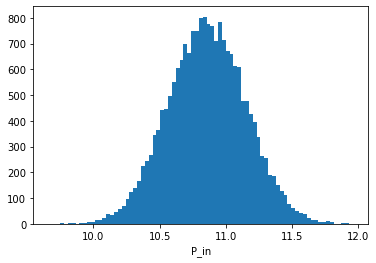

In [6]:
# Plot historgram
plt.hist(uni_simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

### Chi-Square

In [7]:
from helper_functions import compute_chi_square

results = compute_chi_square(uni_simulation)

Distribution: weibull_min || Parameters: (3.3403851324279707, -3.0029122972236, 3.3480246793844817)
Distribution: norm || Parameters: (1.2992781453898975e-15, 0.9999999999999999)
Distribution: weibull_max || Parameters: (3.3639999307930806, 3.0224833477957747, 3.3686296652193946)
Distribution: beta || Parameters: (3.4611372432093743, 3.4807304639876806, -2.8202400113711183, 5.656335071249105)
Distribution: invgauss || Parameters: (0.019019974382116358, -7.471646609195451, 392.208241489405)
Distribution: uniform || Parameters: (-2.4665834886878586, 4.942013822809302)
Distribution: gamma || Parameters: (1551639.12105869, -1245.6527791088251, 0.0008027979995927633)
Distribution: expon || Parameters: (-2.4665834886878586, 2.46658348868786)
Distribution: lognorm || Parameters: (0.017241094808032688, -57.970688193762896, 57.962852487875494)
Distribution: pearson3 || Parameters: (0.0025519445584597424, 1.768302840111769e-15, 1.0000152531775894)
Distribution: triang || Parameters: (0.496859048

## Choose Model

### Non-Nested Likelihood Ratio Test

In [9]:
from helper_functions import LRT

Q, qQi = LRT(results.iloc[:2], 1000, n_simulation)
if Q < qQi: print('Select model A')

KeyboardInterrupt: 

### Q-Q Plot

In [ ]:
from helper_functions import standarize

y_std,_,_ = standarize(uni_simulation, 0.99, 0.01)

params1 = results.iloc[0]['Parameters']
params2 = results.iloc[1]['Parameters']

data_points = scipy.stats.weibull_min.rvs(*params1, size=2000)   
data_points2 = scipy.stats.beta.rvs(*params2,size = 2000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 2], [-2, 2], ls="--", c=".3")

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_weibull_min= np.percentile(data_points, percentile_bins)


percentile_cutoffs_beta = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_beta,c='orange',label = 'Beta distribution',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_weibull_min,c='blue',label = 'Weibull_min Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()

In [ ]:
import seaborn as sns
uni_simulation_std, _, _ = standarize(uni_simulation, 0.99, 0.01)

In [ ]:
sns.distplot(a = uni_simulation_std, kde = False, norm_hist=True)
sns.kdeplot(data = uni_simulation_std, shade= False)

In [ ]:
sns.distplot(a = uni_simulation, kde = False, norm_hist=True)

In [ ]:
sns.distplot(a = uni_simulation_std, kde = False, norm_hist=True)
plt.plot(uni_simulation_std, scipy.stats.weibull_min.pdf(uni_simulation_std,*params1))

In [ ]:
plt.plot(uni_simulation_std, scipy.stats.weibull_min.pdf(uni_simulation_std,*params1))

### Kolmogorov-Smirnoff 2 Sample Test

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
data1 = np.random.choice(a = uni_simulation_std, size = 2000)
data2 = data_points
test = ks_2samp(data1,data2)
print(test)

In [ ]:
test_statistic = 0.0245

In [ ]:
n1 = 2000
n2 = 2000
alpha = 0.05
c_alpha = 1.36 # Make a dict mapping c values to alpha
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

In [ ]:
if test_statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

### Confidence Intervals

### Cp

In [ ]:
sigma = params1[1]
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp